![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline

In [3]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


<AxesSubplot:>

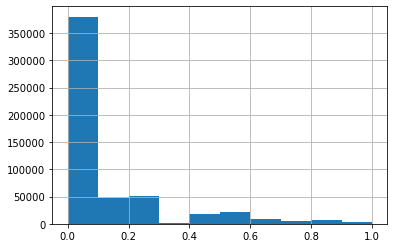

In [4]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [5]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [6]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [7]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [20]:
from nltk.stem import PorterStemmer
import re
import nltk
# init stemmer
porter_stemmer=PorterStemmer()
def preprocessor(text):
    
    text=re.sub("\\W"," ",text) # caracteres especiales
    text=re.sub(" \d+", " ",text) # numeros
    text=re.sub("\\s+(in|the|all|for|and|on)\\s+"," ",text) # algunos conectores
    words=re.split("\\s+",text) # separar texto en palabras
    stemmed_words=[porter_stemmer.stem(word=word) for word in words] # modificar palabras a su raíz
    return ' '.join(stemmed_words)

In [8]:
# Celda 1
vect_A = CountVectorizer(lowercase=False,max_features=10000,preprocessor=preprocessor)
X_dtm_A = vect_A.fit_transform(X_train)
X_Test_A = vect_A.transform(X_test)

In [9]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
Tree = DecisionTreeRegressor()
Tree.fit(X_dtm_A,y_train)
scores_A = cross_val_score(Tree, X_dtm_A, y_train, cv=10,scoring="neg_mean_squared_error")
scores_A.mean()

-0.03956795403847767

In [10]:
pred_A = Tree.predict(X_Test_A)
mse_A = mean_squared_error(y_test, pred_A)

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [11]:
# Celda 2
vect_B = CountVectorizer(lowercase=False,max_features=10000,ngram_range = (3,3),preprocessor=preprocessor)
X_dtm_B = vect_B.fit_transform(X_train)
X_Test_B = vect_B.transform(X_test)

In [12]:
Tree.fit(X_dtm_B,y_train)
scores_B = cross_val_score(Tree, X_dtm_B, y_train, cv=10,scoring="neg_mean_squared_error")
scores_B.mean()

-0.05078210973130787

In [13]:
pred_B = Tree.predict(X_Test_B)
mse_B = mean_squared_error(y_test, pred_B)

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

CountVectorizer se utiliza principalmente para convertir una colección de texto en una matriz donde las filas corresponden a las colecciones y las columnas cada uno de los tokens, por lo tanto cada celda corresponde al número de veces que aparece cada token en la colección determinada. Las desventajas de esta técnica son las siguientes:

•	Su incapacidad para identificar las palabras más y menos importantes para el análisis.
•	Esta técnica solo considera las palabras que abundan en un corpus como la palabra estadísticamente más significativa.
•	No identifica las relaciones entre palabras, como la similitud lingüística entre palabras.

TfidfVectorizer no solo se enfoca en la frecuencia de las palabras presentes en el corpus como lo hace la técnica CountVectorizar, sino que también proporciona la importancia de las palabras. Luego se procede a eliminar los tokens que son menos importantes para el análisis, lo que hace que la construcción del modelo sea menos compleja al reducir las dimensiones de entrada. Una desventaja de esta técnica es que no proporciona información lingüística sobre las palabras, como el significado real de las palabras o la similitud con otras palabras.

¿Cómo funciona TfidfVectorizer?

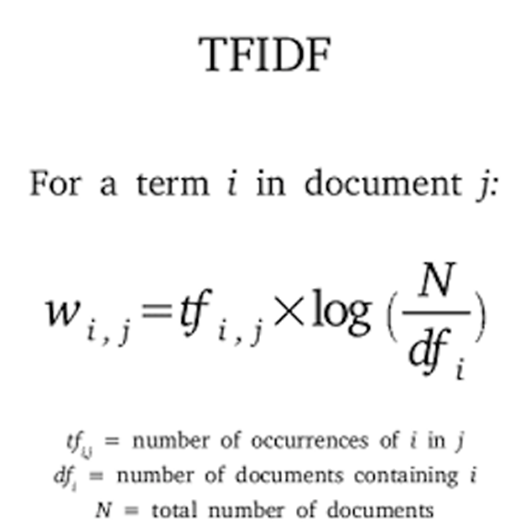

Donde tf es el conteo de tokens por cada colección o documento
N es el número de colecciones o documentos
df es la frecuencia de un token en los documentos. La relación N/df se le llama frecuencia del documento inversa.
Se observa en la fórmula que se extrae la frecuencia de las palabras presentes en el corpus, pero la importancia de las mismas se determina por medio del factor logaritmo(N/df) ya que penaliza matemáticamente las palabras que son demasiado abundantes o muy escasas en el corpus dándoles puntuaciones bajas.

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del acurracy.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [14]:
# Celda 4
vect_C = TfidfVectorizer(lowercase=False,max_features=10000,smooth_idf=True,preprocessor=preprocessor)
X_dtm_C = vect_C.fit_transform(X_train)
X_Test_C = vect_C.transform(X_test)

In [15]:
Tree.fit(X_dtm_C,y_train)
scores_C = cross_val_score(Tree, X_dtm_C, y_train, cv=10,scoring="neg_mean_squared_error")
scores_C.mean()

-0.03849296923884561

In [16]:
pred_C = Tree.predict(X_Test_C)
mse_C = mean_squared_error(y_test, pred_C)

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

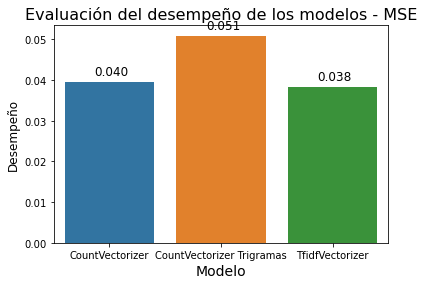

In [19]:
# Celda 5
import seaborn as sns
import matplotlib.pyplot as plt
modelos = ['CountVectorizer','CountVectorizer Trigramas','TfidfVectorizer']
metricas = [mse_A,mse_B,mse_C]
df = pd.DataFrame(zip(modelos,metricas), columns=['Modelo', 'Desempeño MSE']) 

plots = sns.barplot(x=modelos, y=metricas, data=df) 
  
for bar in plots.patches: 
    plots.annotate(format(bar.get_height(), '.3f'),  
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=12, xytext=(2, 10), 
                   textcoords='offset points') 
    
  
plt.xlabel("Modelo", size=14) 
plt.ylabel("Desempeño", size=12)  
plt.title("Evaluación del desempeño de los modelos - MSE", size=16) 


lt.show() 

Al analizar el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle, se observa que se cuenta con 541.462 colecciones o registros. 

Al usar la técnica de CountVectorizer con los parámetros por defecto y sin realizar ningún tipo de restricciones se tiene como resultado 141.176 tokens. Sin embargo al realizar el entrenamiento, predicción y hallar la medida de desempeño es un proceso que no se puede realizar debido a la cantidad tanto de colecciones como de tokens. Por lo tanto,como solución se decide utilizar una función de preprocesamiento que permite eliminar caracteres especiales, números, conectores entre palabras y utilizar un pquete que permite modificar la palabra a su palabra raíz. Esto disminuye la cantidad de tokens a 98460. 

Sin embargo, dado que contiuamos teniendo tiempos de ejecución altos, se decide correr el CountVectorizer ajustando el parámetro de max_features a 10.000. 

Al observar la gráfica anterior donde se muestra el MSE de cada uno de los tres modelos, estos valores se encuentran entre 0.038 y 0.051. Si se comparan los resultados de CountVectorizer (Primer punto) con Countvectorizer y trigramas (segundo punto) se observa que al usar trigramas el MSE aumenta. Sin embargo, quien presenta mejor desempeño es la técnica TfidfVectorizer que no solo se enfoca en la frecuencia de las palabras presentes en el corpus sino que también proporciona la importancia de las palabras, aquí tambien se usan unigramas y la medida de desempeño me arroja un valor de 0.038